In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale=1.3)
import matplotlib.pyplot as plt
%matplotlib inline

# Load rating data

In [12]:
df = pd.read_csv('../data/movielens/ratings.csv')
df['date'] = pd.to_datetime(df.timestamp, unit='s')
df.drop('timestamp', axis=1, inplace=True)
# df.sort_values(['userId', 'date'], inplace=True)
df.head()

,userId,movieId,rating,date
6,1,2762,4.5,2015-03-09 22:48:20
13,1,54503,3.5,2015-03-09 22:48:33
26,1,112552,5.0,2015-03-09 22:48:56
23,1,96821,5.0,2015-03-09 22:49:42
11,1,5577,5.0,2015-03-09 22:49:57


In [82]:
df.date.max()

Timestamp('2017-08-04 06:57:50')

In [88]:
print("Count")
print("  #Users:\t", df.userId.unique().size)
print("  #Items:\t", df.movieId.unique().size)
print("  #Records:\t", len(df))

Count
  #Users:	 270896
  #Items:	 45115
  #Records:	 26024289


# Ratings

## User rating count

[Text(0,0.5,'#Users'), Text(0.5,0,'User ratings count')]

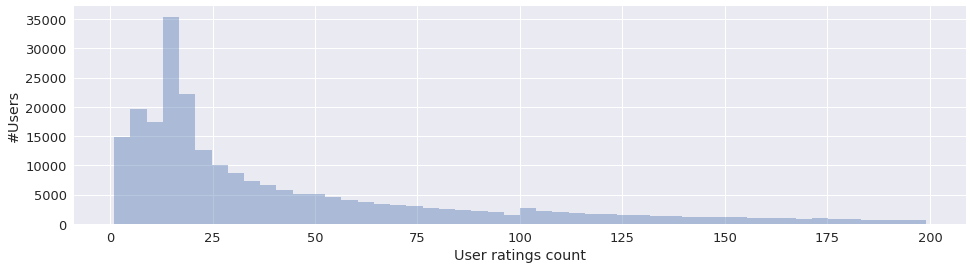

In [90]:
cnt = df.groupby('userId')['date'].count()
cnt_cut = cnt[cnt < 200]

fig, ax = plt.subplots(figsize=(16,4))

sns.distplot(cnt_cut.sort_values(), kde=False, bins=50, ax=ax)
del cnt_cut

ax.set(xlabel='User ratings count',
       ylabel='#Users')

([<matplotlib.patches.Wedge at 0x7f83ecbb4208>,
 [Text(1.09125,0.499164,'< 10'),
  Text(-1.09887,-0.0498107,'10 ~ 200'),
  Text(0.968452,-0.521633,'200 ~ 500'),
  Text(1.18835,-0.166804,'500 ~ 1000'),
  Text(1.19949,-0.0349117,'> 1000')],
 [Text(0.636565,0.291179,'14%'),
  Text(-0.599385,-0.0271695,'74%'),
  Text(0.528246,-0.284527,'9%'),
  Text(0.693204,-0.0973022,'3%'),
  Text(0.699704,-0.0203652,'1%')])

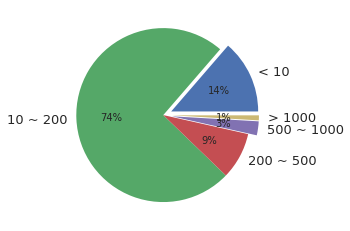

In [93]:
# User rating percentage
a = len(cnt[cnt < 10])
b = len(cnt[cnt < 200])
c = len(cnt[cnt < 500])
d = len(cnt[cnt < 1000])
e = len(cnt)

fracs = a, b-a, c-b, d-c, e-d
labels = ['< 10', '10 ~ 200', '200 ~ 500', '500 ~ 1000', '> 1000']
explode = [0.1, 0, 0, 0.1, 0.1]
plt.subplot(aspect=1)
plt.pie(x=fracs, labels=labels, explode=explode,
        autopct='%.0f%%')

Most of the user have short sequence length. However, some users have very long sequence.

## Item long tail

[Text(0,0.5,'Log(#rating)'), Text(0.5,0,'Items')]

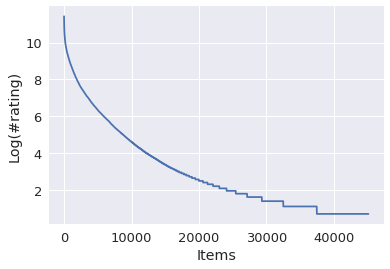

In [24]:
cnt = df.groupby('movieId')['rating'].count().sort_values(ascending=False)
cnt = np.log1p(cnt)

fig, ax = plt.subplots()
ax.plot(cnt.values)
ax.set(xlabel='Items',
       ylabel='Log(#rating)')

## Rating percentage

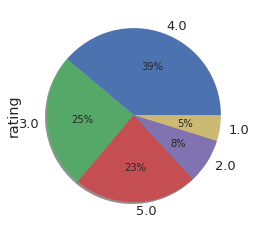

In [60]:
cnt = df['rating'].apply(np.ceil).value_counts()
plt.subplot(aspect=1)
cnt.plot.pie(autopct='%.0f%%', shadow=True)

# Date

## Year count

In [61]:
cnt = df.groupby(df['date'].dt.year)['rating'].count()

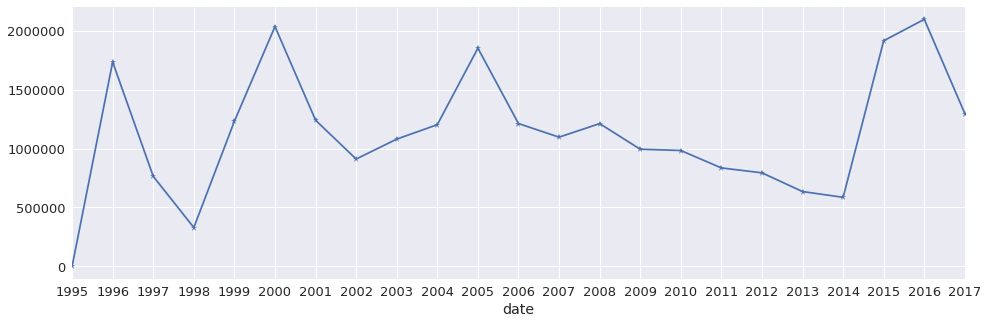

In [76]:
cnt.plot(figsize=(16,5), marker="*", xticks=cnt.index)